In [334]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [336]:
df = pd.read_csv('D:/BACK UP 3-8-2024/application_record.csv')

In [337]:
df1 = pd.read_csv('D:/BACK UP 3-8-2024/cc/credit_record.csv')

In [340]:
df1

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [342]:
df1['STATUS'].value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

In [344]:
# Define a mapping dictionary
status_mapping = {
    'C': 0,  # No issue
    '0': 0,  # No issue
    'X': 0,  # Missing or no issue (interpret as needed)
    '1': 1,  # Delinquent
    '2': 1,  # Delinquent
    '3': 1,  # Delinquent
    '4': 1,  # Delinquent
    '5': 1   # Severe delinquency
}

# Apply the mapping
df1['STATUS'] = df1['STATUS'].map(status_mapping)

# Verify the mapping
print(df1['STATUS'].value_counts())


STATUS
0    1034381
1      14194
Name: count, dtype: int64


In [346]:
df1.shape

(1048575, 3)

In [348]:
g_b = df1[['ID', 'STATUS']]

In [350]:
g_b['STATUS'].value_counts()

STATUS
0    1034381
1      14194
Name: count, dtype: int64

In [352]:
g_b

,ID,STATUS
0,5001711,0
1,5001711,0
2,5001711,0
3,5001711,0
4,5001712,0
...,...,...
1048570,5150487,0
1048571,5150487,0
1048572,5150487,0
1048573,5150487,0


In [354]:
g_b.isnull().sum()

ID        0
STATUS    0
dtype: int64

In [356]:
df.shape

(438557, 18)

In [358]:
g_b.shape

(1048575, 2)

In [360]:
dfm = df.merge(g_b, on='ID', how = 'left')

In [362]:
dfm.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        362928
CNT_FAM_MEMBERS             0
STATUS                 402100
dtype: int64

In [35]:
dfm = dfm.dropna()

In [36]:
dfm.shape

(537667, 19)

In [38]:
dfm.nunique()

ID                     25134
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         195
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              5206
DAYS_EMPLOYED           3299
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           18
CNT_FAM_MEMBERS           10
STATUS                     2
dtype: int64

# simple EDA

In [364]:
cd = dfm.drop_duplicates(subset='ID')

In [366]:
cd.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
count,4.385100e+05,438510.000000,4.385100e+05,438510.000000,438510.000000,438510.0,438510.000000,438510.000000,438510.000000,438510.000000,36457.000000
mean,6.022035e+06,0.427381,1.875254e+05,-15998.022996,60566.188769,1.0,0.206128,0.287770,0.108200,2.194463,0.010478
std,5.714962e+05,0.724874,1.100893e+05,4185.016222,138770.072835,0.0,0.404524,0.452724,0.310634,0.897192,0.101826
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.609362e+06,0.000000,1.215000e+05,-19484.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,6.047720e+06,0.000000,1.609402e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,6.454161e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,1.000000


In [45]:
cd

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0.0
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0
66,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0
71,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0
98,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175978,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,1.0
1175990,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0.0
1176014,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0.0
1176047,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,1.0


<Axes: xlabel='STATUS', ylabel='count'>

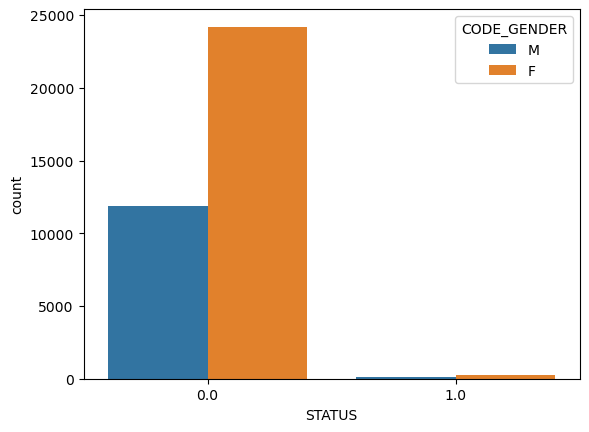

In [368]:
sns.countplot(data=cd, x='STATUS', hue='CODE_GENDER')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Higher education'),
  Text(1, 0, 'Secondary / secondary special'),
  Text(2, 0, 'Incomplete higher'),
  Text(3, 0, 'Lower secondary'),
  Text(4, 0, 'Academic degree')])

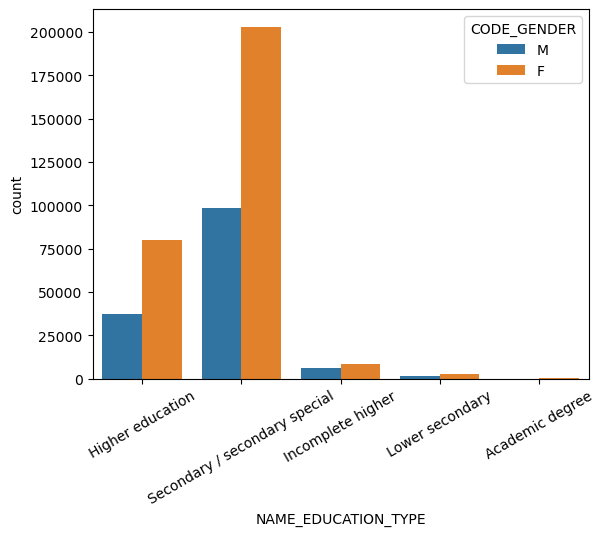

In [370]:
sns.countplot(data=cd, x = 'NAME_EDUCATION_TYPE', hue='CODE_GENDER')
plt.xticks(rotation=30)

<Axes: xlabel='CODE_GENDER', ylabel='count'>

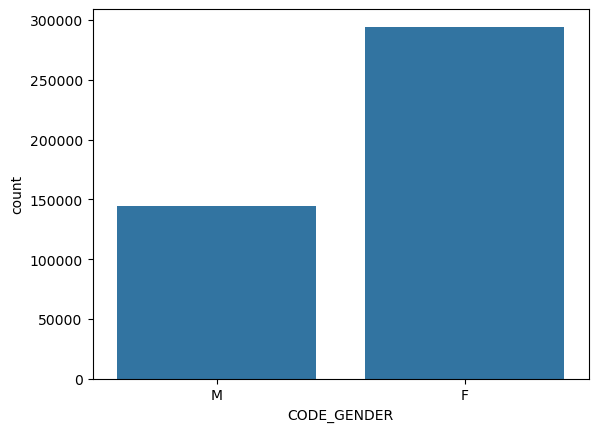

In [372]:
sns.countplot(data=cd, x='CODE_GENDER')

In [374]:
avg_inc = cd.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].mean()

<Axes: xlabel='CODE_GENDER'>

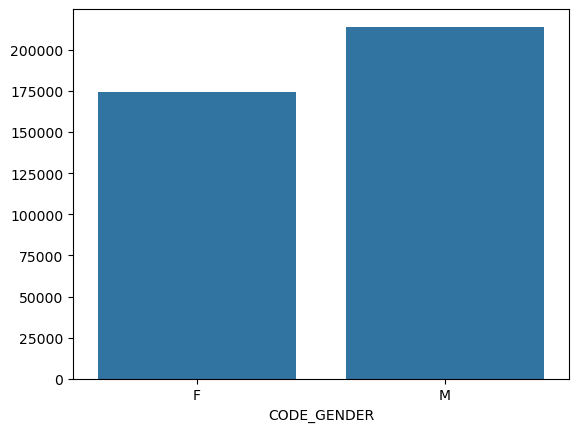

In [376]:
sns.barplot(x=avg_inc.index, y=avg_inc.values)

<Axes: ylabel='AMT_INCOME_TOTAL'>

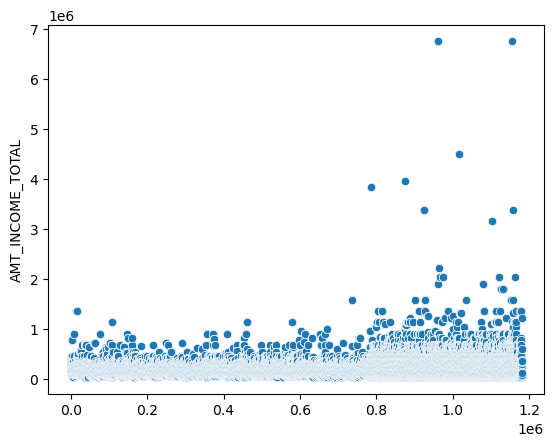

In [378]:
sns.scatterplot(cd['AMT_INCOME_TOTAL'])

<Axes: ylabel='AMT_INCOME_TOTAL'>

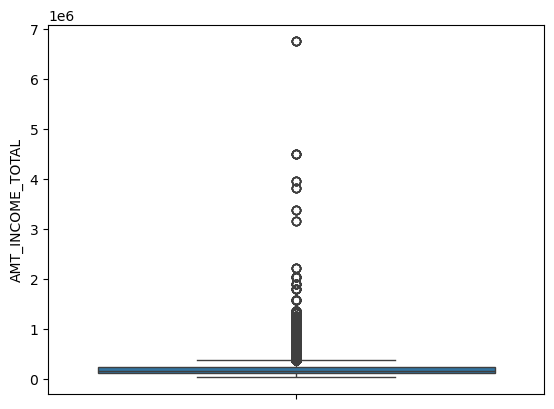

In [380]:
sns.boxplot(cd['AMT_INCOME_TOTAL'])

In [382]:
cd['AMT_INCOME_TOTAL'].describe()

count    4.385100e+05
mean     1.875254e+05
std      1.100893e+05
min      2.610000e+04
25%      1.215000e+05
50%      1.609402e+05
75%      2.250000e+05
max      6.750000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [384]:
ni = cd['AMT_INCOME_TOTAL']

# removing outlier Usin IQR

In [386]:
p_25 = ni.quantile(0.25)
p_75 = ni.quantile(0.75)

In [388]:
p_75

225000.0

In [390]:
iqr = p_75 - p_25

In [392]:
iqr

103500.0

In [394]:
ul = p_75 + iqr*1.5
ll = p_25 - iqr*1.5

In [396]:
ul

380250.0

In [398]:
ll

-33750.0

In [400]:
ni[ni.values > ul].shape

(19106,)

In [402]:
cd.drop(cd[cd['AMT_INCOME_TOTAL'] > 360000.0].index, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3136\1614421924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd.drop(cd[cd['AMT_INCOME_TOTAL'] > 360000.0].index, inplace=True)


<Axes: ylabel='AMT_INCOME_TOTAL'>

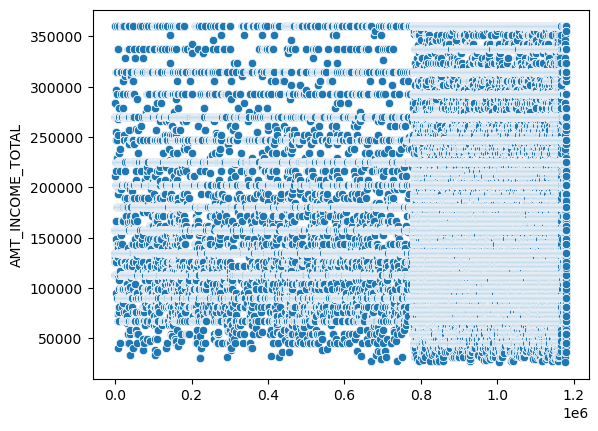

In [404]:
sns.scatterplot(cd['AMT_INCOME_TOTAL'])

<Axes: ylabel='AMT_INCOME_TOTAL'>

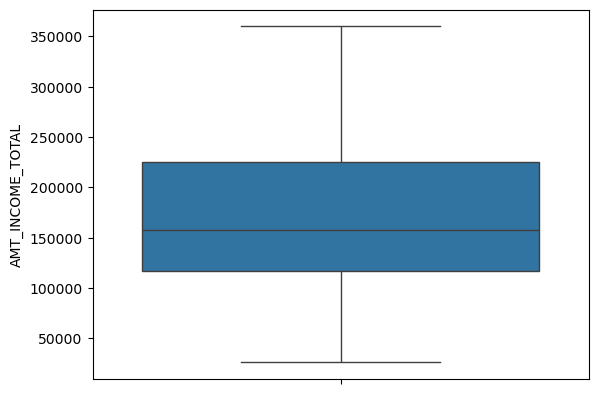

In [406]:
sns.boxplot(cd['AMT_INCOME_TOTAL'])

In [408]:
cd.shape

(418864, 19)

In [420]:
cd['ID'].nunique()

418864

In [412]:
cd.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'STATUS'],
      dtype='object')

<Axes: xlabel='FLAG_OWN_CAR', ylabel='count'>

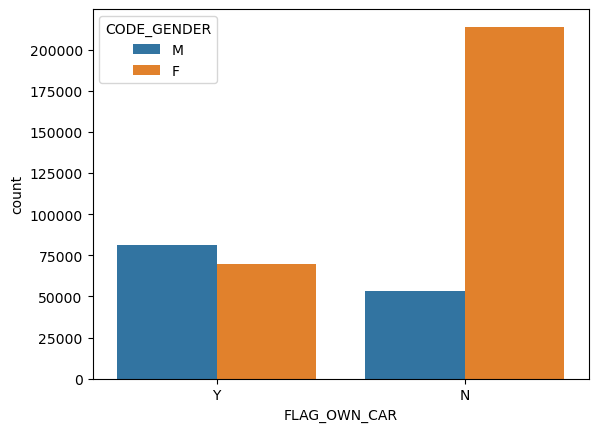

In [414]:
sns.countplot(data=cd, x = 'FLAG_OWN_CAR', hue='CODE_GENDER')

<Axes: ylabel='AMT_INCOME_TOTAL'>

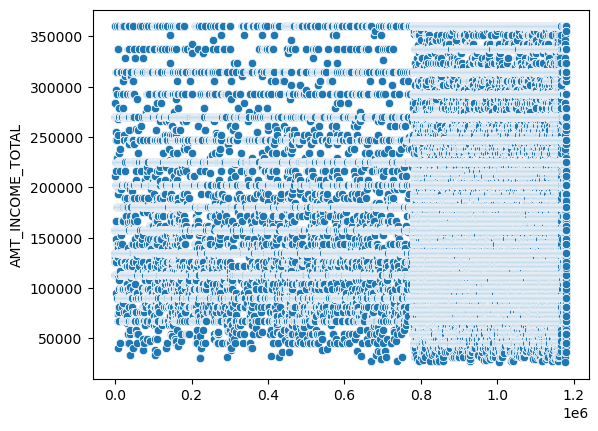

In [415]:
sns.scatterplot(cd['AMT_INCOME_TOTAL'])

In [418]:
inc_work = cd.groupby('AMT_INCOME_TOTAL')['NAME_INCOME_TYPE'].sum()

In [103]:
inc_work

AMT_INCOME_TOTAL
27000.0                                 WorkingWorkingWorking
31500.0     Commercial associateCommercial associateCommer...
32400.0     State servantState servantState servantState s...
36000.0                   WorkingWorkingWorkingWorkingWorking
36900.0                                        WorkingWorking
                                  ...                        
342000.0    State servantState servantState servantState s...
346500.0    Commercial associateCommercial associateCommer...
351000.0    WorkingWorkingWorkingCommercial associateState...
355500.0    Commercial associateCommercial associateCommer...
360000.0    Commercial associateCommercial associateCommer...
Name: NAME_INCOME_TYPE, Length: 148, dtype: object

In [105]:
cd.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'STATUS'],
      dtype='object')

In [422]:
cd['STATUS'].value_counts()

STATUS
0.0    34519
1.0      359
Name: count, dtype: int64

In [428]:
cd.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
STATUS                 0
dtype: int64

In [426]:
cd = cd.dropna()

In [430]:
cd.shape

(23954, 19)

# Encoding

In [117]:
from sklearn.preprocessing import LabelEncoder

In [119]:
cd.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0.0
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0
66,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0
71,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0
98,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0


In [481]:
cd['FLAG_OWN_REALTY'].value_counts()

FLAG_OWN_REALTY
Y    15626
N     8328
Name: count, dtype: int64

In [483]:
le = LabelEncoder()

In [133]:
cd['CODE_GENDER'] = le.fit_transform(cd['CODE_GENDER'])
cd['FLAG_OWN_CAR'] = le.fit_transform(cd['FLAG_OWN_CAR'])
cd['FLAG_OWN_REALTY'] = le.fit_transform(cd['FLAG_OWN_REALTY'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_3136\3917367751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['CODE_GENDER'] = le.fit_transform(cd['CODE_GENDER'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_3136\3917367751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['FLAG_OWN_CAR'] = le.fit_transform(cd['FLAG_OWN_CAR'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_3136\3917367751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [521]:
cd['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
4    15090
0     6561
2     2282
1       11
3       10
Name: count, dtype: int64

In [523]:
cd['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
4    16312
1     6478
2      963
3      187
0       14
Name: count, dtype: int64

In [525]:
cd['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
1    16644
3     3274
0     2081
2     1398
4      557
Name: count, dtype: int64

In [527]:
cd['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
1    21064
5     1379
2      786
4      407
3      173
0      145
Name: count, dtype: int64

In [507]:
cd['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 6115
Core staff               3416
Sales staff              3384
Managers                 2497
Drivers                  2051
High skill tech staff    1348
Medicine staff           1185
Accountants              1168
Cooking staff             646
Security staff            558
Cleaning staff            547
Private service staff     330
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               147
HR staff                   81
Realty agents              79
IT staff                   53
Name: count, dtype: int64

In [497]:
cd.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
31,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0.0
61,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0
66,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0
71,5008810,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0
98,5008811,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0


In [127]:
columns_to_encode = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
le = LabelEncoder()

for col in columns_to_encode:
    cd[col] = le.fit_transform(cd[col])

C:\Users\DELL\AppData\Local\Temp\ipykernel_3136\2213646042.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd[col] = le.fit_transform(cd[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_3136\2213646042.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd[col] = le.fit_transform(cd[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_3136\2213646042.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [129]:
cd.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
31,5008806,M,Y,Y,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,Security staff,2.0,0.0
61,5008808,F,N,Y,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0
66,5008809,F,N,Y,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0
71,5008810,F,N,Y,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0
98,5008811,F,N,Y,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0


# scalling

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

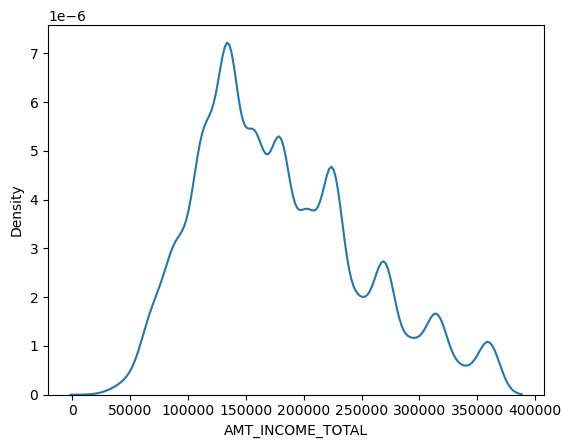

In [155]:
sns.kdeplot(cd['AMT_INCOME_TOTAL'])

In [157]:
from sklearn.preprocessing import StandardScaler

In [159]:
ss = StandardScaler()

In [161]:
cd['inc_scaled'] = ss.fit_transform(cd[['AMT_INCOME_TOTAL']])

C:\Users\DELL\AppData\Local\Temp\ipykernel_3136\993995121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['inc_scaled'] = ss.fit_transform(cd[['AMT_INCOME_TOTAL']])


In [163]:
cd

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,age,Job_exp,inc_scaled
31,5008806,1,1,1,0,112500.0,4,4,1,1,...,1,0,0,0,Security staff,2.0,0.0,60,-4,-0.945250
61,5008808,0,0,1,0,270000.0,0,4,3,1,...,1,0,1,1,Sales staff,1.0,0.0,54,-9,1.274975
66,5008809,0,0,1,0,270000.0,0,4,3,1,...,1,0,1,1,Sales staff,1.0,0.0,54,-9,1.274975
71,5008810,0,0,1,0,270000.0,0,4,3,1,...,1,0,1,1,Sales staff,1.0,0.0,54,-9,1.274975
98,5008811,0,0,1,0,270000.0,0,4,3,1,...,1,0,1,1,Sales staff,1.0,0.0,54,-9,1.274975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175978,5149828,1,1,1,0,315000.0,4,4,1,1,...,1,0,0,0,Managers,2.0,1.0,49,-7,1.909325
1175990,5149834,0,0,1,0,157500.0,0,1,1,1,...,1,0,1,1,Medicine staff,2.0,0.0,35,-4,-0.310900
1176014,5149838,0,0,1,0,157500.0,1,1,1,1,...,1,0,1,1,Medicine staff,2.0,0.0,35,-4,-0.310900
1176047,5150049,0,0,1,0,283500.0,4,4,1,1,...,1,0,0,0,Sales staff,2.0,1.0,51,-2,1.465280


<Axes: xlabel='inc_scaled', ylabel='Density'>

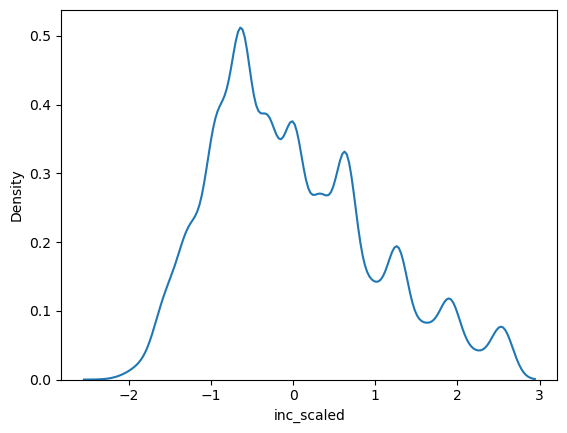

In [546]:
sns.kdeplot(cd['inc_scaled'])

# Feature Engineering & Feature Selection

In [559]:
cd_c = cd.drop(['OCCUPATION_TYPE','AMT_INCOME_TOTAL'], axis=1)

In [563]:
cor = cd_c.corr()

<Axes: >

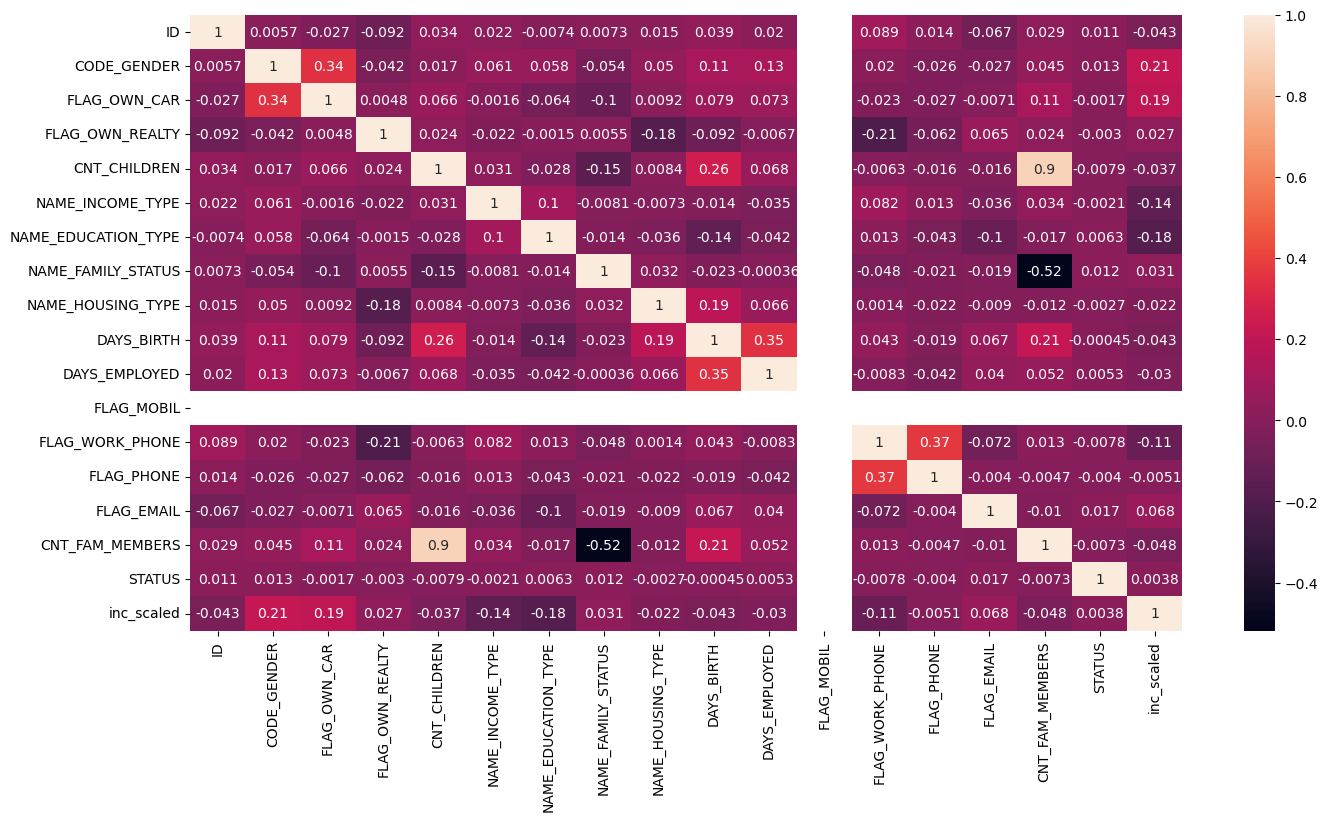

In [571]:
plt.figure(figsize=(16, 8))
sns.heatmap(cor, annot=True)

In [165]:
cd

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,age,Job_exp,inc_scaled
31,5008806,1,1,1,0,112500.0,4,4,1,1,...,1,0,0,0,Security staff,2.0,0.0,60,-4,-0.945250
61,5008808,0,0,1,0,270000.0,0,4,3,1,...,1,0,1,1,Sales staff,1.0,0.0,54,-9,1.274975
66,5008809,0,0,1,0,270000.0,0,4,3,1,...,1,0,1,1,Sales staff,1.0,0.0,54,-9,1.274975
71,5008810,0,0,1,0,270000.0,0,4,3,1,...,1,0,1,1,Sales staff,1.0,0.0,54,-9,1.274975
98,5008811,0,0,1,0,270000.0,0,4,3,1,...,1,0,1,1,Sales staff,1.0,0.0,54,-9,1.274975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175978,5149828,1,1,1,0,315000.0,4,4,1,1,...,1,0,0,0,Managers,2.0,1.0,49,-7,1.909325
1175990,5149834,0,0,1,0,157500.0,0,1,1,1,...,1,0,1,1,Medicine staff,2.0,0.0,35,-4,-0.310900
1176014,5149838,0,0,1,0,157500.0,1,1,1,1,...,1,0,1,1,Medicine staff,2.0,0.0,35,-4,-0.310900
1176047,5150049,0,0,1,0,283500.0,4,4,1,1,...,1,0,0,0,Sales staff,2.0,1.0,51,-2,1.465280


In [143]:
cd['age'] = 1- (cd['DAYS_BIRTH'] // 365)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3136\142198371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['age'] = 1- (cd['DAYS_BIRTH'] // 365)


In [151]:
cd['Job_exp'] = (cd['DAYS_EMPLOYED'] // 365)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3136\2601095726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['Job_exp'] = (cd['DAYS_EMPLOYED'] // 365)


In [171]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23954 entries, 31 to 1176057
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   23954 non-null  int64  
 1   CODE_GENDER          23954 non-null  int32  
 2   FLAG_OWN_CAR         23954 non-null  int32  
 3   FLAG_OWN_REALTY      23954 non-null  int32  
 4   CNT_CHILDREN         23954 non-null  int64  
 5   AMT_INCOME_TOTAL     23954 non-null  float64
 6   NAME_INCOME_TYPE     23954 non-null  int32  
 7   NAME_EDUCATION_TYPE  23954 non-null  int32  
 8   NAME_FAMILY_STATUS   23954 non-null  int32  
 9   NAME_HOUSING_TYPE    23954 non-null  int32  
 10  DAYS_BIRTH           23954 non-null  int64  
 11  DAYS_EMPLOYED        23954 non-null  int64  
 12  FLAG_MOBIL           23954 non-null  int64  
 13  FLAG_WORK_PHONE      23954 non-null  int64  
 14  FLAG_PHONE           23954 non-null  int64  
 15  FLAG_EMAIL           23954 non-null  i

In [203]:
cd['age'] = ss.fit_transform(cd[['age']])

C:\Users\DELL\AppData\Local\Temp\ipykernel_3136\448001034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['age'] = ss.fit_transform(cd[['age']])


In [223]:
X = cd.drop(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL','FLAG_WORK_PHONE','FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'DAYS_BIRTH','DAYS_EMPLOYED'	,'Job_exp','STATUS'], axis=1)

In [207]:
y = cd['STATUS']

In [209]:
cd.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,age,Job_exp,inc_scaled
31,5008806,1,1,1,0,112500.0,4,4,1,1,...,1,0,0,0,Security staff,2.0,0.0,1.890907,-4,-0.945250
61,5008808,0,0,1,0,270000.0,0,4,3,1,...,1,0,1,1,Sales staff,1.0,0.0,1.262794,-9,1.274975
66,5008809,0,0,1,0,270000.0,0,4,3,1,...,1,0,1,1,Sales staff,1.0,0.0,1.262794,-9,1.274975
71,5008810,0,0,1,0,270000.0,0,4,3,1,...,1,0,1,1,Sales staff,1.0,0.0,1.262794,-9,1.274975
98,5008811,0,0,1,0,270000.0,0,4,3,1,...,1,0,1,1,Sales staff,1.0,0.0,1.262794,-9,1.274975


In [211]:
X.shape

(23954, 13)

In [213]:
y.shape

(23954,)

# Train_test_split

In [251]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [227]:
X_train.shape

(19163, 11)

In [285]:
y_train.value_counts()

STATUS
0.0    18952
1.0      211
Name: count, dtype: int64

In [219]:
y_train.shape

(19163,)

In [229]:
X_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,CNT_FAM_MEMBERS,age,inc_scaled
635817,0,1,1,0,4,2,1,1,1.0,0.111254,1.274975
757489,0,1,1,4,4,1,1,1,3.0,0.529996,-0.564640
186739,0,0,0,0,1,1,5,1,3.0,-0.726230,-0.945250
101984,1,0,0,4,4,2,5,1,2.0,0.215939,-0.945250
780692,0,1,1,0,1,3,5,1,1.0,-1.459028,0.640625
...,...,...,...,...,...,...,...,...,...,...,...
709578,1,1,1,4,2,1,1,1,2.0,-1.459028,-0.628075
175001,1,1,0,4,4,3,1,1,1.0,-1.354342,-0.628075
27245,0,0,1,4,4,1,1,1,2.0,0.215939,-1.579600
522021,0,0,1,4,4,1,1,1,4.0,-1.354342,-1.579600


# Model Selection

In [232]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm  import SVC

In [241]:
models = {
    'rf' : RandomForestClassifier(random_state=42),
    'xg' : XGBClassifier(random_state=42),
    'svm': SVC(random_state=42)
}

In [238]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [253]:
results = []

for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    p_score = precision_score(y_test, y_pred, average='weighted')
    r_score = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc_score,
        'F1 Score': f1,
        'Precision': p_score,
        'Recall': r_score,
        'Confusion Matrix': cm
    })

results_df = pd.DataFrame(results)
print(results_df)

  Model  Accuracy  F1 Score  Precision    Recall       Confusion Matrix
0    rf  0.987685  0.984845   0.983039  0.987685  [[4726, 13], [46, 6]]
1    xg  0.987685  0.983373   0.979803  0.987685   [[4731, 8], [51, 1]]
2   svm  0.989146  0.983749   0.978410  0.989146   [[4739, 0], [52, 0]]


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [257]:
from sklearn.model_selection import RandomizedSearchCV

In [273]:
prm  = {
    "n_estimators" : [50, 100, 150],
    "criterion" : ['gini' , 'entropy', 'log_loss'],
    "max_depth" : [2,3,4,5],
    "max_features" : ['sqrt', 'log2']
}

In [275]:
rf = RandomForestClassifier(random_state=42)

In [309]:
rc = RandomizedSearchCV(
    estimator= rf,
    param_distributions=prm,
    n_iter=50,
    n_jobs=-1,
    scoring= 'accuracy',
    cv = 5,
    verbose=2,
    random_state=42
)

In [311]:
rc.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='accuracy', verbose=2)

In [315]:
print ('Best Accuracy Score: ',rc.best_score_)

Best Accuracy Score:  0.9889892032002056


In [317]:
print ('Best Parameter: ', rc.best_params_)

Best Parameter:  {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 2, 'criterion': 'gini'}


# Training Model on Best Parameter

In [320]:
rf = RandomForestClassifier (
    n_estimators=100,
    max_features= 'log2',
    max_depth=2,
    criterion= 'gini',
    random_state=42
)

In [322]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features='log2', random_state=42)

In [326]:
yp = rf.predict(X_test)
acs = accuracy_score(y_test, yp)

accuracy score:  0.9891463160091839


In [328]:
f1 = f1_score(y_test, y_pred, average='weighted')
p_score = precision_score(y_test, y_pred, average='weighted')
r_score = recall_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

In [330]:
print('accuracy score: ', acs)
print('f1_score: ', f1 )
print ('precision: ', p_score)
print ('recall: ', r_score)
print ('Confusion Matrix: ', cm)

accuracy score:  0.9891463160091839
f1_score:  0.9833726048499621
precision:  0.9798030416422492
recall:  0.9876852431642663
Confusion Matrix:  [[4731    8]
 [  51    1]]
